# Итоговая работа 
# по курсу "Математика для Data Science"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.optimize import minimize
import scipy.stats as sts

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)):

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

#### Задание 1a

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
# матрица расстояний между векторами
# sklearn.metrics.pairwise_distances вычисляет попарно расстояния между векторами
# [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html]

distance = pairwise_distances(raitings, metric='cosine')
distance


array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [4]:
# мин расстояния для каждого i-го до j-го вектора
result1 = [min(row[np.nonzero(row)]) for row in distance]
result1


[0.08934017664269545,
 0.12861947760697723,
 0.08126948526431932,
 0.14113130412890507,
 0.12051522839237483,
 0.1448509235881108,
 0.16725789294423699,
 0.1554831487434658,
 0.08934017664269545,
 0.08126948526431932]

In [5]:
# определение индексов пар наиболее похожих векторов 
for i, vector in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


#### Задание 1b

In [6]:

# Импорт Анализ главных компонентов (PCA) из sklearn.decomposition
from sklearn.decomposition import PCA

# импорт Среднеквадратичная ошибка регрессии из sklearn.metrics
from sklearn.metrics import mean_squared_error


In [7]:
# Уменьшение размерности raitings с 15 до 5 (mse - Среднеквадратичная ошибка регрессии)

n = 5

pca = PCA(n_components=n,
      copy = True,
      whiten = False, 
      svd_solver = 'auto', 
      tol = 0.0, 
      iterated_power = 'auto',
      random_state = 42)
raitings_reduced = pca.fit_transform(raitings)              # Уменьшение размерности raitings
raitings_inverse = pca.inverse_transform(raitings_reduced)  # Преобразование данных обратно в исходное пространство
mse = mean_squared_error(raitings, raitings_inverse)  # Среднеквадратичная ошибка регрессии
print(f'Исходный вектор: {raitings}')
print(f'Уменьшенная размерность: {raitings_reduced}')
print(f'Восстановленная размерность: {raitings_inverse}')
print(f'Среднеквадратичная ошибка: {mse}')


Исходный вектор: [[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
 [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
 [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
 [ 6  1  9  7  7  9  2  3  5  1  6  6  3  2  7]
 [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
 [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
 [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
 [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
 [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
Уменьшенная размерность: [[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.0145674

При n=5 Среднеквадратичная ошибка = 1.2455442696728185, что достаточно высоко, например, увеличение числа компонент до n=7 снизит ошибку до 0.1033.

## Задание 2¶
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [8]:
# Импорт derivative из scipy.misc для расчета производной
from scipy.misc import derivative

# Импорт библиотеки sympy для выполнения символьных вычислений
from sympy import *
x = symbols('x')

Формула 1-й производной c sympy.diff()

In [9]:
# Формула 1-й производной c sympy.diff()
dif_1 = diff(tan(sin(x)+cos(2*x+3))**2, x)
dif_1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

Использование scipy.misc derivative для нахождения производной

In [10]:
# Использование scipy.misc derivative для нахождения производной
'''Отдает функцию, производную которой нужно найти'''
def f(x):
    return tan(sin(x)+cos(2*x+3))**2


In [11]:
# Формула 1-й производной
derivative(f, x, n=1)

-0.5*tan(sin(x - 1.0) + cos(2*x + 1.0))**2 + 0.5*tan(sin(x + 1.0) + cos(2*x + 5.0))**2

In [12]:
# Значение 1-й производной в x = 1.0
x1 = 1.0
derivative(f, x1, n=1, dx=1e-6)

55.3859176433136

## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [13]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [14]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [15]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

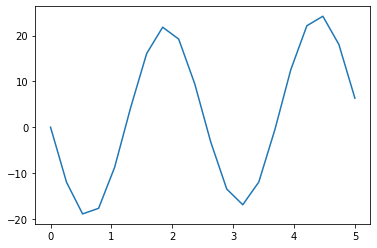

In [16]:
plt.plot(x, fx)
plt.show()

In [17]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
# нахождение минимума функции error и параметров a, b функции f(x, a, b) с помощью scipy.optimize.minimize(method='COBYLA')
# начальные параметры - params = [0, 0]
result = minimize(error, [0, 0], method='COBYLA')
result

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

In [19]:
# параметры a, b
a = result.x[0]
b = result.x[1]
a,b

(3.0001879620826215, -2.500089262452252)

## Задание 4¶
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [20]:
# генерация дискретной случайной величины

samples_count = 1000
size = 50

rv = np.random.randint(1,21,(samples_count, size))


Text(0.5, 0, '$x$')

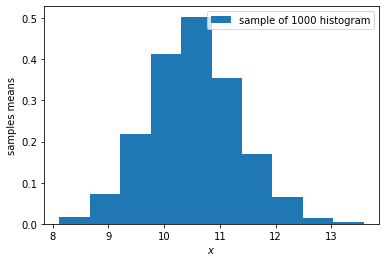

In [21]:
# Массивы для сохранения средних по выборкам
a1 = np.array([])

for n in range(samples_count):
        # На каждом цикле генерируем выборки разных размеров
#         sample1 = rv.rvs(size=n1)
        # Считаем среднее по каждой выборке и добавляем в массив средних
        a1 = np.append(a1, rv[n].mean())
# Строим графики
label_1 = 'sample of ' + str(samples_count) + ' histogram' # Подписи для графиков
plt.hist(a1, density=True, label=label_1)
plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')


## Задание 5¶
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге).

In [22]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [23]:
# расчет собственных значений и собственных векторов матрицы
w,v = np.linalg.eig(m)


In [24]:
# собственные значения
w


array([ 3., -1.])

In [25]:
# собственные векторы
v


array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

Проверка: $np.dot(m, v) = w*v$

In [26]:
np.dot(m, v)

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

In [27]:
 w*v

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])